Klasifikasi Perumahan Surabaya dengan Menggunakan Algoritma Naive Bayes

In [43]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB #Menunjukkan algoritma yang kita panggil adalah algoritma Naive Bayes
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
# read csv file perumahan_surabaya
df = pd.read_csv('analisis_perumahan_surabaya.csv')
df 

,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Jumlah Lantai,Price,Label
0,2,2,45,60,1,"Rp800,000,000.00",Low
1,2,2,45,60,1,"Rp800,000,000.00",Low
2,2,1,45,90,2,"Rp800,000,000.00",Low
3,2,2,45,59,2,"Rp800,000,000.00",Low
4,5,3,45,60,2,"Rp800,000,000.00",Low
...,...,...,...,...,...,...,...
545,3,3,84,110,2,"Rp2,000,000,000.00",High
546,3,3,84,110,2,"Rp2,000,000,000.00",High
547,3,3,84,110,2,"Rp2,000,000,000.00",High
548,3,3,84,110,2,"Rp2,000,000,000.00",High


In [45]:
# Menentukan nilai independent dan Dependent Variabel
x = df.iloc[:,:5].values
y = df.iloc[:,6].values

In [46]:
x

array([[  2,   2,  45,  60,   1],
       [  2,   2,  45,  60,   1],
       [  2,   1,  45,  90,   2],
       ...,
       [  3,   3,  84, 110,   2],
       [  3,   3,  84, 110,   2],
       [  3,   3,  84, 110,   2]], dtype=int64)

In [47]:
y

array(['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low',

Split Data (0.8 Training, 0.2 Testing)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

#Untuk melihat jumlah data, dari masing-masing data train dan data test
print("x_train = ", len(x_train))
print("X_test = ", len(x_test))
print("y_train = ",len(y_train))
print("y_test = ",len(y_test))

x_train =  440
X_test =  110
y_train =  440
y_test =  110


Melakukan Pengskalaan Nilai dari Dataset

In [51]:
#Tujuannya agar tidak terjadi bias
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [52]:
x_train

array([[ 0.22398484, -0.13687392,  0.16809939, -0.88817846,  0.67428477],
       [ 0.22398484, -0.13687392, -0.83820989,  0.15813619,  0.67428477],
       [ 0.22398484, -0.13687392,  0.61534796,  1.32070802, -1.27759219],
       ...,
       [ 0.22398484, -0.13687392,  9.5044133 ,  1.32070802, -1.27759219],
       [ 0.22398484, -0.13687392,  1.25826778,  1.03006507, -1.27759219],
       [ 3.25639502, -1.41824676,  0.16809939,  1.32070802, -1.27759219]])

In [53]:
x_test

array([[ 2.23984843e-01,  1.14449892e+00,  1.11850260e+00,
        -4.23149725e-01, -1.27759219e+00],
       [ 2.23984843e-01, -1.36873917e-01, -7.82303821e-01,
        -1.32506767e-01,  6.74284769e-01],
       [ 2.23984843e-01,  1.14449892e+00, -4.18914357e-01,
        -1.32506767e-01,  6.74284769e-01],
       [ 2.23984843e-01,  1.14449892e+00,  3.81177759e-04,
         1.58136191e-01, -1.27759219e+00],
       [-1.29222025e+00, -1.41824676e+00,  1.50984510e+00,
         7.39422108e-01,  6.74284769e-01],
       [-1.29222025e+00, -1.41824676e+00, -1.17364632e+00,
        -1.93449311e+00,  6.74284769e-01],
       [ 2.23984843e-01, -1.36873917e-01,  1.67756332e+00,
         8.55679291e-01, -1.27759219e+00],
       [ 2.23984843e-01, -1.36873917e-01, -1.11774025e+00,
        -1.12069282e+00,  6.74284769e-01],
       [ 2.23984843e-01, -1.36873917e-01,  7.27160105e-01,
        -9.46307050e-01,  6.74284769e-01],
       [ 2.23984843e-01,  1.14449892e+00, -2.79149179e-01,
         9.71936474e-01

Membuat Model & Training

In [55]:
nb_clf = GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

Testing Model

In [57]:
y_predict = nb_clf.predict(x_test)
y_predict

array(['Medium', 'Medium', 'Medium', 'Medium', 'High', 'Low', 'High',
       'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'High', 'Medium', 'Low', 'Low', 'High',
       'Low', 'Medium', 'Low', 'Medium', 'Low', 'High', 'High', 'Medium',
       'Medium', 'Medium', 'High', 'High', 'Medium', 'Low', 'Medium',
       'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Medium',
       'Low', 'Low', 'High', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'High',
       'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'High',
       'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Low', 'Low', 'Medium', 'High', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Medium',
   

Evaluasi Model

Tingkat Akurasi: 60 persen
              precision    recall  f1-score   support

        High       0.38      0.23      0.29        22
         Low       0.75      0.69      0.72        52
      Medium       0.51      0.69      0.59        36

    accuracy                           0.60       110
   macro avg       0.55      0.54      0.53       110
weighted avg       0.60      0.60      0.59       110



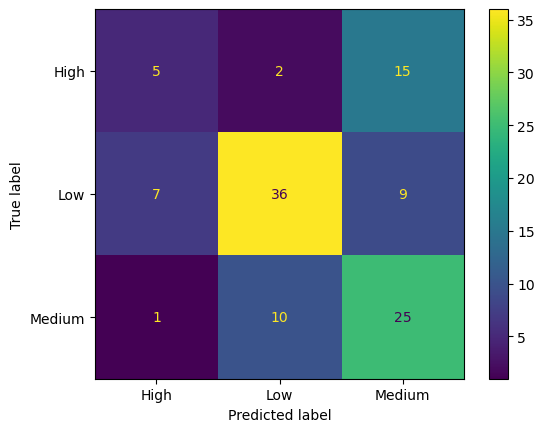

In [59]:
akurasi = accuracy_score(y_test,y_predict)
print('Tingkat Akurasi: %d persen'%(akurasi*100))
print(metrics.classification_report(y_test, y_predict))
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)